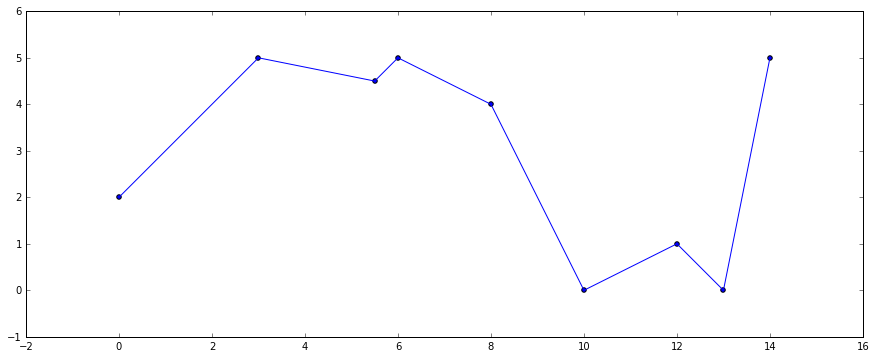

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
poly = np.array([[0,2],
                 [3,5],
                 [5.5,4.5],
                 [6,5],
                 [8,4],
                 [10,0],
                 [12,1],
                 [13,0],
                 [14,5]
                ]);
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

In [3]:
import math
#from http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html
def point_line_distance(x0,y0,x1,y1,x2,y2):
    return abs((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)) / math.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))

print point_line_distance(1,3,1,2,2,3)
print point_line_distance(0,0,-2,0,0,-2)


0.707106781187
1.41421356237


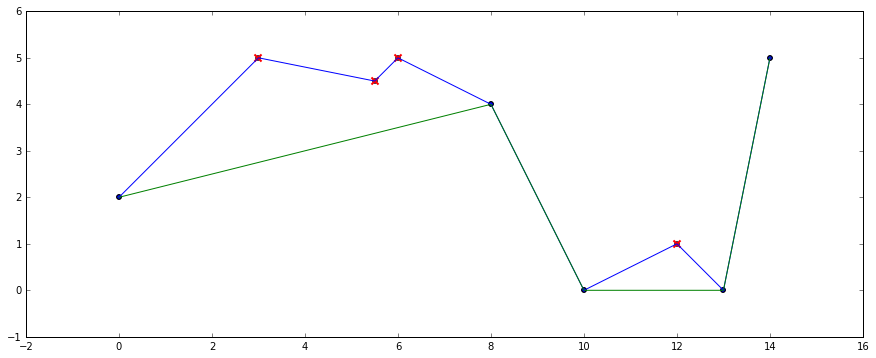

In [14]:
def simplify_perpendicular_distance(tolerance,p,step=-1):
    mask = np.ones(len(poly),dtype='bool')
    first = 0
    second = 1
    third = 2
    
    marker = np.array([p[first],p[second],p[third]],dtype='double')
    
    if step == -1:
        maxstep = len(p)
    else:
        maxstep = min(step,len(p))
    
    for i in range(1,min(1+maxstep,len(p)-1)):
        dist = point_line_distance(p[second,0],p[second,1],p[first,0],p[first,1],p[third,0],p[third,1])
        #print dist
        if dist <= tolerance:
            mask[i] = False
        else:
            first = second
        second = third
        third=second+1
        if second < len(p):
            marker = np.array([p[first],p[second]],dtype='double')
        if third < len(p):
            marker = np.array([p[first],p[second],p[third]],dtype='double')        
    return mask,marker

mask,_ = simplify_perpendicular_distance(1.5,poly)

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')

#the original polygon
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

#simplified polygon
simplified = poly[mask]
plt.plot(simplified[:,0],simplified[:,1])
plt.scatter(simplified[:,0],simplified[:,1])

#deleted points
deleted = poly[np.logical_not(mask)]
plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)

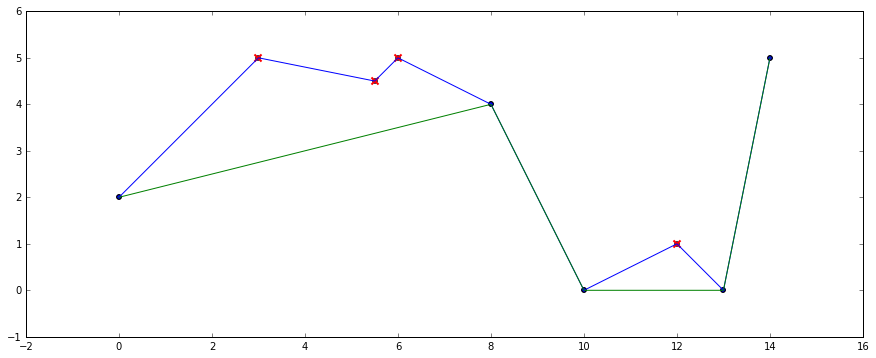

In [16]:
def plotpoly(tolerance,step):
    mask, marker = simplify_perpendicular_distance(tolerance,poly,step)
    #print marker
    simplified = poly[mask]
    fig = plt.figure(figsize=(15,6))
    fig.gca().set_aspect('equal', adjustable='box')

    #original
    plt.plot(poly[:,0],poly[:,1])
    plt.scatter(poly[:,0],poly[:,1])
    #simplified
    plt.plot(simplified[:,0],simplified[:,1])
    plt.scatter(simplified[:,0],simplified[:,1])

    #deleted points
    deleted = poly[np.logical_not(mask)]
    plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)

    #markers
    if len(marker):
        plt.plot(marker[::2,0],marker[::2,1],color='red')
        if len(marker)>2:
            vec = marker[2]-marker[0]
            c = plt.Circle(marker[1],tolerance,linestyle='--',color='red',linewidth=2.0,fill=False)
            fig.gca().add_artist(c)

from IPython.html.widgets import *
interact(plotpoly, tolerance=(0,5,0.1), step=(0,len(poly)-2,1));